# Case Study 6: Hunt for the Higgs Bosons with Deep Neural Networks
Jaclyn Coate, Reagan Meagher, Megan Riley

## 1. Introduction

The ongoing hunt for the building blocks of our universe is something the physics community has been leading for decades. Most recently the Higgs Boson particle was discovered in high-energy physics (also known as particle physics) experimentation. The branch of high-energy physics is the idea of being able to identify those smallest components of matter and radiation [1]. The idea is that these elementary components are the building blocks that allow us to understand the behavior of those observable traits in our universe. The current and most dominant theory in the industry is termed the _Standard Model_; and the most recent discovered particle is called the _Higgs boson_. Discovered in 2012 by European Council for Nuclear Research (CERN) with the large hadron collider [2]. 

The _Higgs boson_ particle is the newest particle discovered by physicists. In order to discover a particle physicists have to successfully isolate a "subspace of their high-dimensional data" [3] where the hypothesis of a potential new particle (force) produces a significant difference than the null hypothesis of no difference. This frame allows for statistical testing to take place and help determine if a new particle/force exists. The process that is responsible for the production of the _higgs boson_ was a previously unknown to physicists, the researchers leveraged the Monte Carlo simulations to build models that would allow the sample processes signals to be generated and therefore classify if a signal processes is likely to or not to produce _higgs boson_. Monte Carlo simulations are particularly skilled at the studies of properties of tests when assumptions that they are pulled from are not necessarily met. Due to this fact, researchers leveraged this method for the _higgs boson_ research. Deep learning algorithms are particularly talented in obtaining inference from large amounts of data when there are very small differences to indicate signal and therefore class separation, the Monte Carlo simulations created 11 million signals,  Baldi, Sadowski, and Whiteson decided to leverage deep neural networks (DNNs). In the instance of these data the researchers used 28 different features, 21 of kinematic properties and the additional 7 engineered features. These 7 engineered features were created from functions of those original 21 features that allow the researchers to determine between the two classes of signals that either indicate the presence of a _higgs boson_ or no _higgs boson_. In the following case study we used those details in the researcher's paper in an attempt to reconstruct their study and reproduce their results. We will discuss those steps we took to produce the same research, we also will discuss those challenges we encountered and things we discovered in our efforts.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
print(tf.__version__)

2.4.1


In [ ]:
 
 #To correctly load data from googledrive. 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Issues with versioning large data on github, data in GoogleDrive
#not referenced directly the data is located at the link below with the file id below
#Full Data w/ 32 bit. 
data_location = "https://drive.google.com/file/d/1IF6CuFXL1F7Jcn7ebPhRTDZcQQzYkkn_/view?usp=sharing"
file_id = "1IF6CuFXL1F7Jcn7ebPhRTDZcQQzYkkn_"

In [ ]:
#Load up data local access to read in correctly

downloaded = drive.CreateFile({'id':file_id})   # replace the id with id of file you want to access
downloaded.GetContentFile('HIGGS.csv')        # replace the file name with your file
#Loading with pandas. Loading link directly causes errors otherwise.

col_names = ["target","lepton pT", "lepton eta", "lepton phi",
             "missing energy magnitude", "missing energy phi",
             "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag",
             "jet 2 pt", "jet 2 eta", "jet 2 phi", "jet 2 b-tag",
             "jet 3 pt", "jet 3 eta", "jet 3 phi", "jet 3 b-tag",
             "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag",
             "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]

raw_higgs = pd.read_csv('HIGGS.csv', header = 0, names = col_names, dtype = np.float32)
raw_higgs.shape



(11000000, 29)

## 2. Data

The data provided is a set of Monte Carlo simulations of the signals for processes that produce _Higgs bosons_ as well as the background processes (noise) that do not produce _Higgs bosons_ . The data contained 11 million instances of 28 different features. These features consist of 21 kinematic properties measured by particle deterors within the accelerator and an additional 7 engineer features. The variable of interest, or target variable, is a binary variable where the 1 indicates that a _Higgs boson_ process has been detected, whilst the 0 symbolized the background process (or noise). The data sets were close to balanced with 53% positive examples or signal of the _Higgs boson_ particle seen. The features input were standardized over the entirety of both the train and test data sets with a mean of zero, a standard deviation of one. There was a single exception for those features with values that were greater than zero, these values were then scaled so that the mean value was one [3]. 

So Far this code


*   splits raw into target and features,
*   scales the features on 0 to 1
*   prints histograms of the features. (i can probably pretty this up, maybe get some facets
*   sets up a train/test split of 90/10 -500k test and 4.5 mill train



In [ ]:
total_target = raw_higgs["target"]
raw_higgs = raw_higgs.drop("target",axis = 1)

In [ ]:
raw_higgs.describe()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,9.999576e-01,-8.295326e-06,-1.350998e-05,9.995067e-01,2.613714e-05,1.003104e+00,-2.031853e-05,7.719664e-06,9.535252e-01,1.003218e+00,-1.027750e-05,-2.076009e-05,9.416873e-01,1.001818e+00,1.459535e-05,3.679993e-06,1.027140e+00,9.949507e-01,-5.757519e-06,1.745386e-05,9.804655e-01,1.070756e+00,1.047028e+00,1.045546e+00,1.032730e+00,9.890985e-01,1.054917e+00,9.898391e-01
std,5.607220e-01,1.000114e+00,1.000483e+00,5.949429e-01,1.000413e+00,4.701700e-01,1.000630e+00,9.999282e-01,1.017531e+00,4.949443e-01,1.000321e+00,1.000214e+00,1.082197e+00,4.830273e-01,9.996756e-01,1.000384e+00,1.164582e+00,5.007632e-01,9.989089e-01,1.000464e+00,1.350694e+00,6.625793e-01,3.757028e-01,1.593048e-01,3.937330e-01,5.193388e-01,3.613682e-01,3.121480e-01
min,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889811e-01,-2.913090e+00,-1.742372e+00,0.000000e+00,2.636076e-01,-2.729663e+00,-1.742069e+00,0.000000e+00,3.653542e-01,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,6.564608e-01,-6.944718e-01,-8.701791e-01,0.000000e+00,6.508527e-01,-6.998083e-01,-8.711343e-01,0.000000e+00,6.177673e-01,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,8.901377e-01,6.027267e-05,3.514990e-04,0.000000e+00,8.972494e-01,1.728937e-04,-7.519117e-04,0.000000e+00,8.682333e-01,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,1.201875e+00,6.945924e-01,8.698727e-01,2.214872e+00,1.221798e+00,7.001541e-01,8.713947e-01,2.548224e+00,1.220930e+00,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,2.913210e+00,1.743175e+00,2.214872e+00,1.470899e+01,2.730009e+00,1.742884e+00,2.548224e+00,1.288257e+01,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_x = scaler.fit_transform(raw_higgs)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[7], scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_x, columns=raw_higgs.columns.values)

Note: median values were scaled by multiplying by 0.2871342599 and adding 0.499969


lepton pT  Feature Scaled Histogram


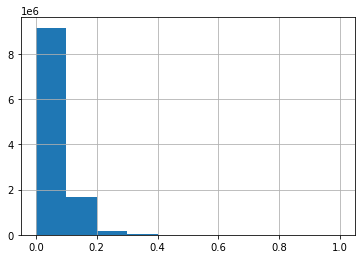

lepton eta  Feature Scaled Histogram


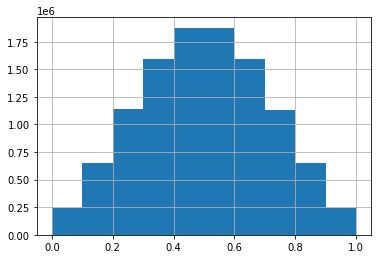

lepton phi  Feature Scaled Histogram


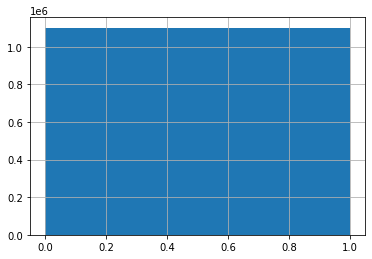

missing energy magnitude  Feature Scaled Histogram


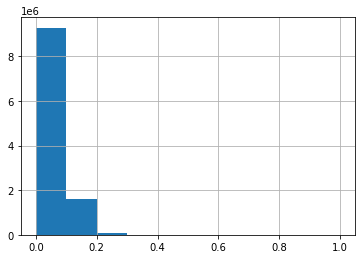

missing energy phi  Feature Scaled Histogram


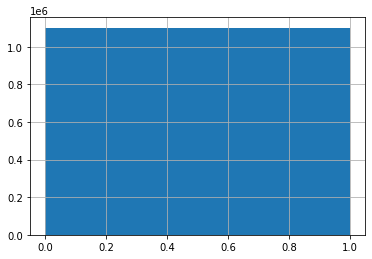

jet 1 pt  Feature Scaled Histogram


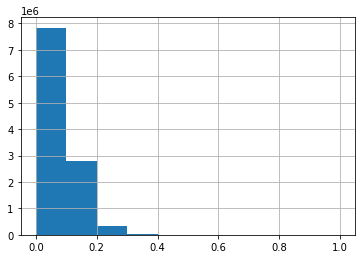

jet 1 eta  Feature Scaled Histogram


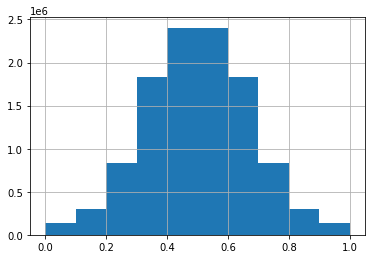

jet 1 phi  Feature Scaled Histogram


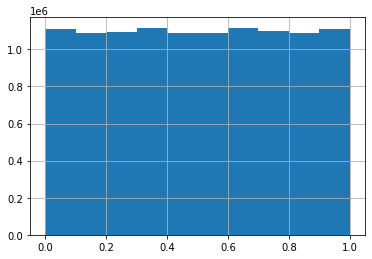

jet 1 b-tag  Feature Scaled Histogram


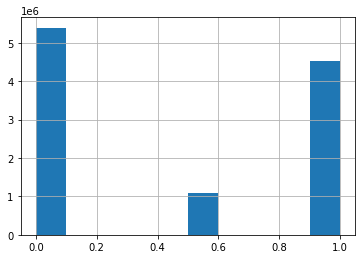

jet 2 pt  Feature Scaled Histogram


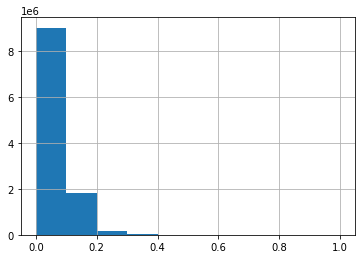

jet 2 eta  Feature Scaled Histogram


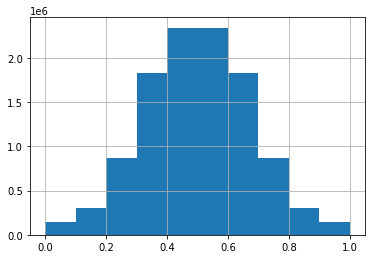

jet 2 phi  Feature Scaled Histogram


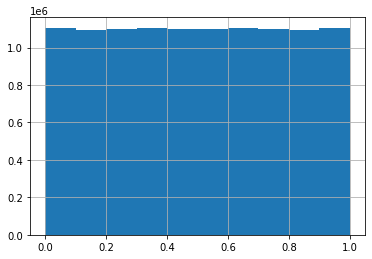

jet 2 b-tag  Feature Scaled Histogram


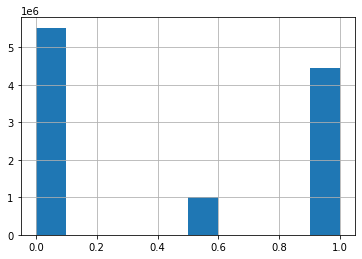

jet 3 pt  Feature Scaled Histogram


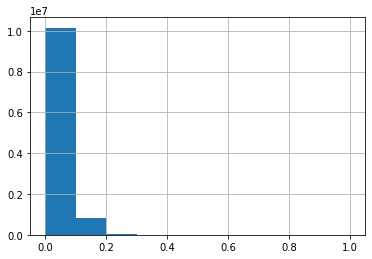

jet 3 eta  Feature Scaled Histogram


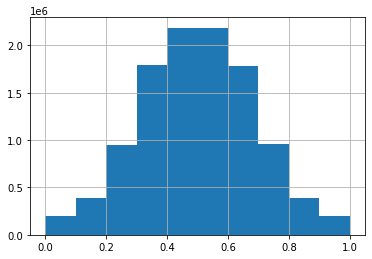

jet 3 phi  Feature Scaled Histogram


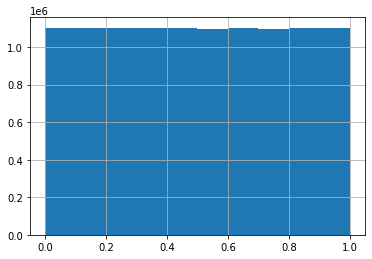

jet 3 b-tag  Feature Scaled Histogram


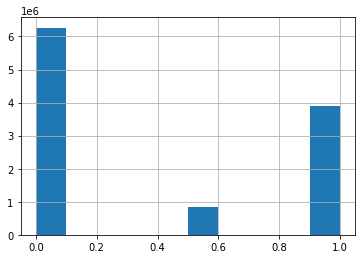

jet 4 pt  Feature Scaled Histogram


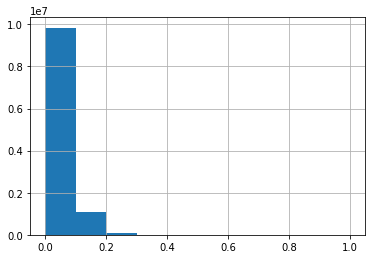

jet 4 eta  Feature Scaled Histogram


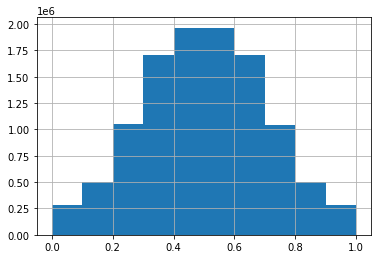

jet 4 phi  Feature Scaled Histogram


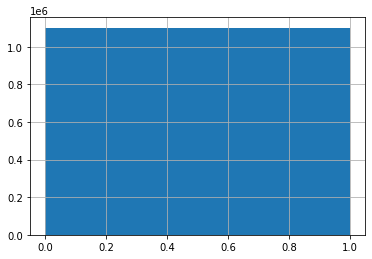

jet 4 b-tag  Feature Scaled Histogram


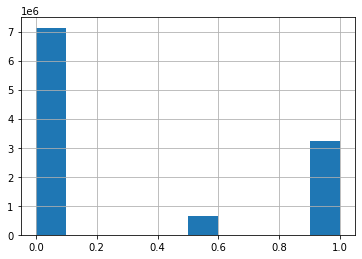

m_jj  Feature Scaled Histogram


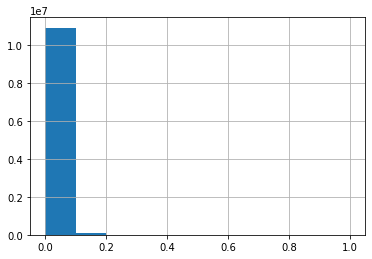

m_jjj  Feature Scaled Histogram


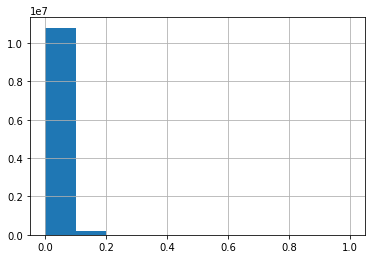

m_lv  Feature Scaled Histogram


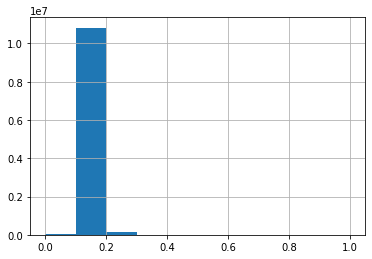

m_jlv  Feature Scaled Histogram


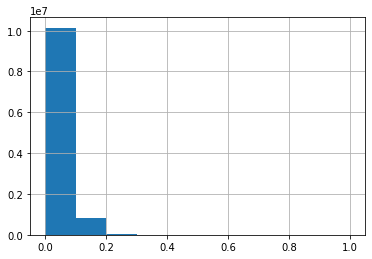

m_bb  Feature Scaled Histogram


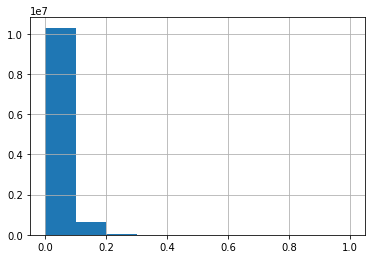

m_wbb  Feature Scaled Histogram


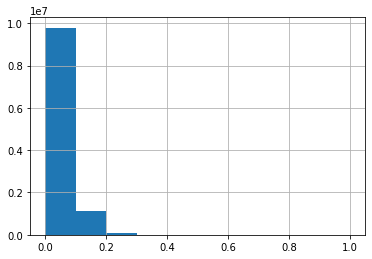

m_wwbb  Feature Scaled Histogram


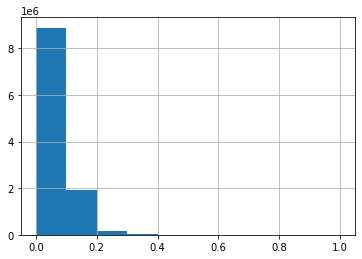

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in scaled_train_df:
    print(i, " Feature Scaled Histogram")
    scaled_train_df[i].hist()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, total_target, test_size=0.10, random_state=7269138)

In [ ]:
x_train.shape

(9900000, 28)

In [ ]:
x_test.shape

(1100000, 28)

## 3. Method: Deep Neural Networks (DNN)

The idea behind machine learning is enabling machines with the ability to make decisions based on learned material, outside of explicitly coded rules by an engineer. Even though there are many tasks that machine learning excels at, there is a pitfall for those unstructured data styles in need of classification [4]. 

In an effort to alleviate these pain points of deep learning the idea of a neural network was born. Deep neural networks or DNN (also known as deep learning) is a sub-branch of machine learning contained within the family tree of tools for artificial intelligence. The main difference between a neural network and a deep neural network is the idea that many more hidden layers are contained within the deep neural network that allows for much more complex patterns to develop and essential learned behavior for the network. These DNNs work with algorithms that are highly inspired from the biological structure and functioning of the human brain. The idea is that this mimicked structure will enable machines with what, can only be described as, human intelligence. The flow of information through the DNN starts in a node (neuron) through input and an activation function is calculated within each of those nodes. Leveraging a simplistic rule the node then passes an output to the next node, very similar to the interactions between neurons in a brain. As the output increases from a node, then the higher the significance (weight) of that input dimension would be. The dimensional output is folded into the next layer to form an additional dimension. This process is amplified several times over and allows for the development of a complex network with several connections capable of using activation functions and weighted importance of output that is then feedback through the network to allow for learning through backpropagation. The continued iteration of this process with more data assists the network to update the weights of importance of outcomes (probabilities) effectively creating a system that allows for decision prediction output based on the rules it has essentially created for itself without an engineer's explicit programming [5]. 

Due to computational costs and hardware this took until more recently to develop and show strides in the machine learning community. Leveraging a deep learning model does have a caveat, the data available must be in surplus. Some examples we use daily in our lives that leverage deep learning models. The tag suggestions on Facebook, self driving Tesla, any voice assistant on your phone, computer, or smart device. 

### 3.1 Model Design

For our replication of the work completed by Baldi, Sadowski, and Whiteson 2014 we want to show their hyperparameter tuning efforts. We will not execute this but will effectively leverage those best parameters they surfaced.

They leveraged the hyper-parameters in such a way to research if the DNN were indeed able to learn the discriminative information within the high-level features in the data. In order to do this they trained separate classifiers we have indicated those mimicked hyperparameter settings in the below table: _Table 3.1.1: DNN Hyperparameter Training_ [3]. [3].

#### Table 3.1.1: DNN Hyperparameter Training

|Hyper-parameters|Choices|
|--|:--|
|Depth|2, 3, 4, 5, 6 layers|
|Hidden units per layer|100, 200, 300, 500 |
|Initial learning rate|0.01, 0.05|
|Weight decay| 0, 10^-5|
|Pre-training|none, autoencoder|

After the above tuning the below  hyperparameters for the five-layer neural network (multi-perceptron) with 300 hidden units within each layer. We will implement their learning rate of 0.05, and a weight decay coefficient of 1 × 10^−5. They indicate that the extra hidden units, additional hidden layers, and pre-training computation costs far outweighed the lack of increasing performance [3]. Below we have outlined the layers and their corresponding hyperparameters for review in _TTable 3.1.2: DDN Model Layer Hyperparameters_. 

#### Table 3.1.2: DDN Model Layer Hyperparameters

| Object | Weight Initialization | Weight Decay [L2 regularization] | Activation | Node Count |
|--|:--|:--|:--|:--|
|Layer 1 |𝞵 = 0, 𝞼 = 0.1 |1x10^-5|tanh|300|
|Layer 2 |𝞵 = 0, 𝞼 = 0.05 |1x10^-5|tanh|300|
|Layer 3 |𝞵 = 0, 𝞼 = 0.05 |1x10^-5|tanh|300|
|Layer 4 |𝞵 = 0, 𝞼 = 0.05 |1x10^-5|tanh|300|
|Layer 5 |𝞵 = 0, 𝞼 = 0.001 |1x10^-5|tanh|300|

Additionally we will leverage their model training process in an effort to fully replicate the studies results. The Baldi, Sadowski, and Whiteson study leveraged a stochastic gradient descent (SGD) with a batch size of 100. The learning rate started at 0.05 and was systematically reduced by a factor of 1.0000002 for each batch to a final minimum rate of 1X10^-6. The team started the momentum at 0.9 and increased it linearly to 0.99 over 200 epochs plateauing after the 200th epoch. The researchers leveraged an early stopping criterion, they identified that early stopping with a minimum change in error of 0.00001 a cross 10 epochs was used to determine when they should stop the training process. This resulted in training the model over 200-100 epochs. We did note that the researchers failed to indicate the error metrics they used and monitored for indication of early stopping. Therefore, we chose to monitor the binary cross-entropy loss for our early stopping since it is considered a common leveraged variable for practitioners of deep learning. Additionally, we noted that due to the very low number of learning rate reduction for the first couple epochs there is no indicated change, however, during the lifetime of the training we see the reduction of the learning rate occur as expected. We have depicted the training settings outlined in _Table 3.1.1: DNN Training Parameters_

#### Table 3.1.1: Table 3.1.3: DNN Training Parameters

|Training Technique|Selection|
|--|:--|
|Loss|Binary cross-entropy|
|Optimizer|SGD|
|Early stopping|Min reduction of 0.00001 validation loss over 10 epochs|
|Initial learning rate|0.05|
|Learning rate decay|Reduced on each bach by a factor of 1.0000002|
|Minimum learning rate|1X10^-6|
|Initial optimizer momentum|0.9|
|Momentum increase|0.00045 (epoch) + 0.9|
|Maximum optimizer momentum|0.99|


In [ ]:
class CustomLearningRateScheduler(tf.keras.callbacks.Callback):
    """Learning rate scheduler which sets the learning rate according to schedule.

  Arguments:
      schedule: a function that takes an epoch index
          (integer, indexed from 0) and current learning rate
          as inputs and returns a new learning rate as output (float).
  """

    def __init__(self, schedule):
        super(CustomLearningRateScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate.
        scheduled_lr = self.schedule(epoch, lr)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print("\nEpoch %05d: Learning rate is %6.4f." % (epoch, scheduled_lr))

def lr_schedule(epoch, lr):
    """Helper function to retrieve the scheduled learning rate based on epoch."""
    if epoch < 1:
        lr = .05
    else: 
        lr = lr / 1.0000002

    return lr

In [ ]:
class CustomMomentumScheduler(tf.keras.callbacks.Callback):
    """Learning rate scheduler which sets the learning rate according to schedule.

  Arguments:
      schedule: a function that takes an epoch index
          (integer, indexed from 0) and current learning rate
          as inputs and returns a new learning rate as output (float).
  """

    def __init__(self, schedule):
        super(CustomMomentumScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "momentum"):
            raise ValueError('Optimizer must have a "momentum" attribute.')
        # Get the current learning rate from model's optimizer.
        m = float(tf.keras.backend.get_value(self.model.optimizer.momentum))
        # Call schedule function to get the scheduled learning rate.
        scheduled_m = self.schedule(epoch, m)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.momentum, scheduled_m)
        print("\nEpoch %05d: Momentum is %6.4f." % (epoch, scheduled_m))

def m_schedule(epoch, m):
    """Helper function to retrieve the scheduled learning rate based on epoch."""
    if epoch < 1:
        m = .9
    else: 
        m = (0.00045 * epoch) + 0.9

    return m

In [ ]:
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=.00001)

hidden_size = 300
initializerOne = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None)
initializerTwo = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
initializerThree = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.001, seed=None)
weightdecay = 1e-6
kernelregL2 = tf.keras.regularizers.L2(weightdecay)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(hidden_size, activation='tanh', name="layer1", kernel_initializer=initializerOne, kernel_regularizer=kernelregL2))  # adds a layer with 300 neurons, tanh activation
model.add(layers.Dense(hidden_size, activation='tanh', name="layer2", kernel_initializer=initializerTwo, kernel_regularizer=kernelregL2))
model.add(layers.Dense(hidden_size, activation='tanh', name="layer3", kernel_initializer=initializerTwo, kernel_regularizer=kernelregL2))
model.add(layers.Dense(hidden_size, activation='tanh', name="layer4", kernel_initializer=initializerTwo, kernel_regularizer=kernelregL2))
model.add(layers.Dense(hidden_size, activation='tanh', name="layer5", kernel_initializer=initializerThree, kernel_regularizer=kernelregL2))
model.add(layers.Dense(1, activation='sigmoid', name="layer6"))

The referenced study by Baldi, Sadowski, and Whiteson, 2014 state they leveraged 2.6 million training examples and 500,000 observations were leveraged for model validation. The 500,000 test dataset was curated using the same Monte Carlo processes used to develop the training dataset. Due to extreme computation needs of this type of modeling the optimizations in their efforts were not considered thorough. However, they did include a combination of pre-training methods, initial learning rates, network architectures, and regularization methods. We were able to leverage the entirety of the dataset levereing 9.9 million for training our model and 1.1 million observations to test our model. As researchers we decided that testing on as much data is possible will help us more accurately train and test our model. We accomplished this by turning the bit precision down from 64 floats to 32 bit floats. [3].

### 3.2 Model Compile

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['mean_squared_error','mean_absolute_error','accuracy'])

### 3.3 Fit Model

In [ ]:
%%time
model.fit(x_train, 
           y_train, 
           epochs=75, 
           validation_data=(x_test,y_test), 
           callbacks=[
              earlyStoppingCallback,
              CustomLearningRateScheduler(lr_schedule),
              CustomMomentumScheduler(m_schedule), 
           ], 
           batch_size=100)

Epoch 1/75

Epoch 00000: Learning rate is 0.0500.

Epoch 00000: Momentum is 0.9000.
99000/99000 [==============================] - 991s 10ms/step - loss: 0.5867 - mean_squared_error: 0.2009 - mean_absolute_error: 0.4016 - accuracy: 0.6859 - val_loss: 0.5746 - val_mean_squared_error: 0.1960 - val_mean_absolute_error: 0.3918 - val_accuracy: 0.6947
Epoch 2/75

Epoch 00001: Learning rate is 0.0500.

Epoch 00001: Momentum is 0.9004.
99000/99000 [==============================] - 989s 10ms/step - loss: 0.5658 - mean_squared_error: 0.1921 - mean_absolute_error: 0.3840 - accuracy: 0.7040 - val_loss: 0.5572 - val_mean_squared_error: 0.1886 - val_mean_absolute_error: 0.3700 - val_accuracy: 0.7102
Epoch 3/75

Epoch 00002: Learning rate is 0.0500.

Epoch 00002: Momentum is 0.9009.
99000/99000 [==============================] - 1012s 10ms/step - loss: 0.5478 - mean_squared_error: 0.1845 - mean_absolute_error: 0.3689 - accuracy: 0.7187 - val_loss: 0.5429 - val_mean_squared_error: 0.1824 - val_mean_a

### 3.4 Evolution of DNNs

Deep neural networks are a rich and actively evolving area of research. In the seven years since the paper we are replicating the methods of was produced, much of the research has evolved. Much of the author’s work in Baldi et al focuses on how better deep neural networks in general perform compared to shallow neural networks and other traditional machine learning techniques [3]. The model we emulated included multiple layers of tanh activations with three hundred hidden nodes, including elements of tuning gradient descent. Overall our approach and attempt to emulate the author’s methods came up well short of their accuracy metrics. However, other modern implementations of deep neural networks can offer potential for our models to come closer to their accuracy metrics or for those authors or others to build models that have even better results than the authors demonstrated. 

One of the major changes and evolutions in deep neural networks is the popularity of the “relu” or the rectified linear unit activation function. Authors Xavier et al demonstrated in their research the efficacy of relu activation functions in deep neural networks [6]. Importantly they also found relu activation functions performed better than tanh functions in multiple layers. Their focus was on natural language processing functions, but its expected that this increase in performance will carry to other applications. Xavier et al’s comparisons specifically of relu activations to tanh activations is especially important considering the structure of these models included five layers of tanh activations. This shift from tanh to relu functions can offer benefits in both accuracy and reduction of misclassifications. The relu function also offers performance benefits over tanh functions due to the ability of the function to better manage sparsity. This efficiency allows for longer, or more granular training, factors that are essential with the performance demands of deep neural networks. 

A final major technique that is incredibly strong in other areas of machine learning is the use of convolutional neural networks. Convolutional neural networks are incredibly powerful at classifying and detecting images. This sophisticated architecture can create intermittent features that build off the raw data in complex ways that are difficult for us to build alone with simple feature learning and use those previous layers of fresh polynomial features to build stronger predictions. There are a myriad of potential choices when designing these modern deep neural networks and in only seven years the landscape has only become more complex and rife with potential for better results.

## 4. Results

Overall we were able to output a model that performed with over 77% accuracy. While this is not in the 80 like the research paper we were tasked with replicating we are happy with our results. 

As we can see below in our model summary results table we have our layers and parameters output. We see a total of over 370,000 assisted in training and help the DNN output the best performing model according to the accuracy.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 300)               8700      
_________________________________________________________________
layer2 (Dense)               (None, 300)               90300     
_________________________________________________________________
layer3 (Dense)               (None, 300)               90300     
_________________________________________________________________
layer4 (Dense)               (None, 300)               90300     
_________________________________________________________________
layer5 (Dense)               (None, 300)               90300     
_________________________________________________________________
layer6 (Dense)               (None, 1)                 301       
Total params: 370,201
Trainable params: 370,201
Non-trainable params: 0
__________________________________________________

In this figure we are tracking our loss [val_loss] in training to get as low as possible. We do not see any signs of overfitting and as the DNN continued to train we see a continued peak and valley pattern which means the data suggests with additional epochs and unlimited processing time this DNN could potentially have gotten the loss even lower before overfitting became an issue.

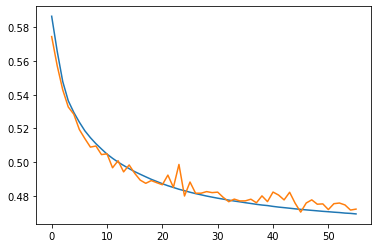

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

Below we have output our training curve to show growth of accuracy overimte. We do not see any indication of overfitting and potentially with even smaller batch sizes with ensured processing time we may have even been able to obtain a higher accuracy.

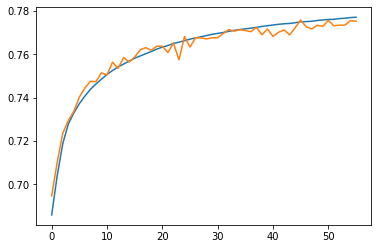

In [ ]:
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

##5. Discussion & Conclusions

Initially we struggled in duplicating those results from the study we researched for this case study. We worked through different seeds and batch sizes to understand what might have been causing our extremely low accuracy - 53%, which seemed to have no change no matter what layer or batch size we were in. After deep investigation of different components of our layers we realized that our final layer for linear activation for interpretation was preventing our ability to grow the accuracy of the model. Once we switched our final layer to sigmoid activation to allow the functions to operate as expected and produce the changes between layers and growth through batch sizes.

As we were working towards an accuracy of around 77%, the researchers in the comparison paper were able to hit an AUC of over .869 at its lowest. They were able to achieve a much higher coverage of prediction then we were. We are not sure what we did differently that resulted in these different metrics.

As further discussed in section 3.4, evolution in DNN, there are practices that can improve model performance for all potential models including use of different activation functions and convolutional or recurrent neural network structures. 

The original model resulted in a highly effective detection of a _higgs boson_ signal and the absence of the same signal. It would likely be used well in the field of particle physics in order to continue research in the industry.  Overall our ability to quantify how our results duplicated the paper follows from our adherence to their methods to the best of our abilities and measuring of accuracy against their model accuracies. Overall our performance fell short by about 10 points of some of the author's best models, which is not unexpected. Despite our ability to reach as high of an accuracy we were able to reproduce to a degree which we were happy with. Given larger resources for processing as well as a timeframe for real life implementation we are confident we would be able to continue and refine the model to reflect closer that which was shown in the study.

## 6. Citations

1. "The Higgs Boson". CERN.
2. "The BEH-Mechanism, Interactions with Short Range Forces and Scalar Particles" (PDF). 8 October 2013.
3. Baldi, P., Sadowski, P., & Whiteson, D. (2014, February 19). Searching for Exotic Particles in High-Energy Physics with Deep Learning. ArXiv.Org. https://arxiv.org/abs/1402.4735
4. Nolan, D. and Lang, D.T. (2015). Data Science in R A Case Studies Approach to Computational Reasoning and Problem Solving. CRC Press.
5. Moolayil, J. J. (2020, May 30). A Layman’s Guide to Deep Neural Networks - Towards Data Science. Medium. https://towardsdatascience.com/a-laymans-guide-to-deep-neural-networks-ddcea24847fb
6. Xavier Glorot, Antoine Bordes and Yoshua Bengio (2011). Deep sparse rectifier neural networks (PDF). AISTATS. 